arrests.csv



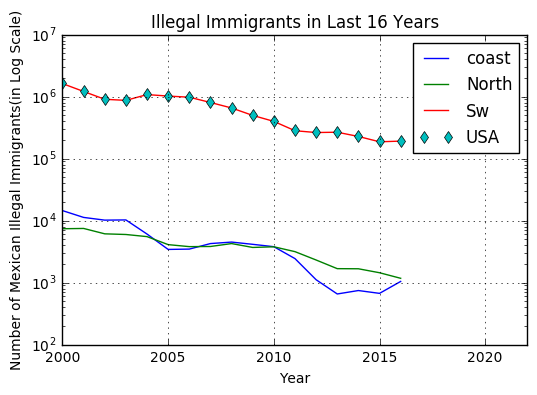

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.
from matplotlib import pylab as plt

immigrants_df = pd.read_csv('../input/arrests.csv')

immigrants_df['Sector'].fillna('All', inplace=True)
immigrants_df_m = immigrants_df[(immigrants_df.Sector=='All')].values

immigrants_df_m = np.delete(immigrants_df_m, [1,2], axis=1)
year_c = np.array(np.arange(2000,2017))

all_immigrant = np.array([immigrants_df_m[:,0]])
mex_immigrant = np.array([immigrants_df_m[:,0]])
l1 = np.array([immigrants_df_m[:,1]])
l2 = np.array([immigrants_df_m[:,2]])
all_immigrant = np.concatenate((all_immigrant.T, l1.T), axis=1)
mex_immigrant = np.concatenate((mex_immigrant.T, l2.T), axis=1)
for val in range(2,len(year_c)+1) :
    i = 2*val-1;
    j = 2*val
    l1 = np.array([immigrants_df_m[:,i]])
    l2 = np.array([immigrants_df_m[:,j]])
    all_immigrant = np.concatenate((all_immigrant, l1.T), axis=1)
    mex_immigrant = np.concatenate((mex_immigrant, l2.T), axis=1)

s_list = ['b','g','r','cd']
legend_list = ['coast','North','Sw','USA']

for i in range(4):
    plt.plot(year_c,mex_immigrant[i,1:],s_list[i])

    plt.grid(True)

    plt.title('Illegal Immigrants in Last 16 Years')
        
    plt.xlabel('Year')
    plt.ylabel('Number of Mexican Illegal Immigrants(in Log Scale)')
    
    plt.xlim(2000,2022)
    plt.yscale('log')
    

plt.legend(legend_list)
plt.show()